# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1: Itay Galili

# Details Student 2: Nave Shimoni


## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# !pip install wn
# !python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
# import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

# EDA:
Visualization on the data.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Number of Authors by Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Number of Authors')

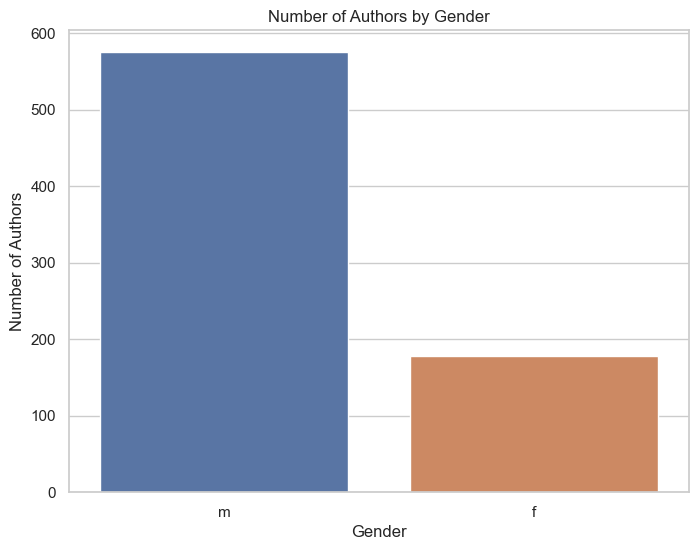

In [11]:
# Count the number of authors by gender
author_counts = df_train['gender'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=author_counts.index, y=author_counts.values)
plt.title('Number of Authors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Authors')
plt.show()

We can clearly see that there are much more male authors than female ones.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='word_count', ylabel='Count'>

<Axes: xlabel='word_count', ylabel='Count'>

Text(0.5, 1.0, 'Word Count Distribution by Gender')

Text(0.5, 0, 'Word Count')

Text(0, 0.5, 'Percentage')

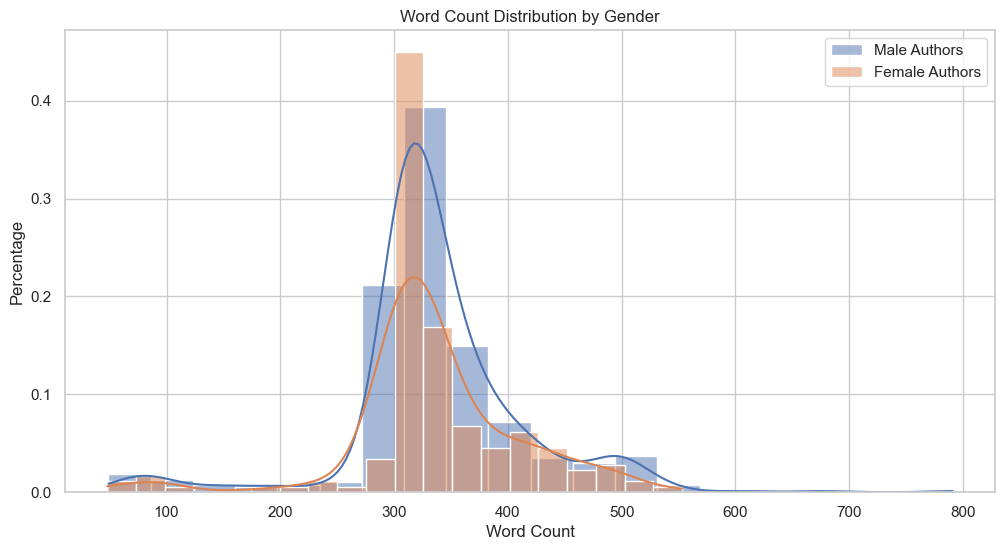

In [13]:
# Filter the data for male and female authors
male_data = df_train[df_train['gender'] == 'm']
female_data = df_train[df_train['gender'] == 'f']

# Create a function to tokenize and count words in a given text
def count_words(text):
    words = text.split()
    return len(words)

# Apply the word count function to male and female data
male_data['word_count'] = male_data['story'].apply(count_words)
female_data['word_count'] = female_data['story'].apply(count_words)

# Create histograms for word count with percentages
total_male_authors = len(male_data)
total_female_authors = len(female_data)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.histplot(data=male_data, x='word_count', bins=20, kde=True, label='Male Authors',
             weights=[1/total_male_authors] * len(male_data))
sns.histplot(data=female_data, x='word_count', bins=20, kde=True, label='Female Authors',
             weights=[1/total_female_authors] * len(female_data))

plt.title('Word Count Distribution by Gender')
plt.xlabel('Word Count')
plt.ylabel('Percentage')
plt.legend()
plt.show()

We can learn from that visualization that there is not a big difference in words count between male and female authors.
The majority in each gender wrote 270-400 words.

# Text Preprocessing:
  Removing punctuation,special characters and digits.

In [14]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
 
    return text

df_train['story'] = df_train['story'].apply(preprocess_text)
df_test['story'] = df_test['story'].apply(preprocess_text)

Lets check exactly what is the ratio between male and female authors.

In [15]:
def calculate_ratio(df, show_size=True):
    genderNum = df.groupby('gender').size()
    if(show_size):
        genderNum
    return genderNum[1] / genderNum[0]


calculate_ratio(df_train)

3.230337078651685

We can see that the ratio is quite big, so we can try to reduce it to avoid bias.

# Undersample:

In [16]:
def fix_male_female_ratio(df_train, ratio_limit = 1.5, limit = 5, value_to_drop = 'm'):
    # Make a copy of the dataframe
    df_train_copy = df_train.copy()

    # Calculate current ratio

    male_female_ratio = calculate_ratio(df_train_copy)
    print(f'Ratio: {male_female_ratio}')

    # Dropping multiple 'male' entries to make the ratio more equal
    value_to_drop = 'm'
    while (male_female_ratio > ratio_limit):
        # Drop random 
        indices_to_drop = df_train_copy[(df_train_copy['gender'] == value_to_drop)].sample(
            n=limit, random_state=42).index
        df_train_copy.drop(indices_to_drop, inplace=True)

        # Calculate current ratio
        male_female_ratio = calculate_ratio(df_train_copy, show_size=False)

    print(f'Ratio after loop: {male_female_ratio}')
    male_female_ratio = calculate_ratio(df_train_copy)

    return df_train_copy

# Machine Learning part 1:
Classifier selection and hyperparameter for Grid search.

In [17]:
# Initialize the classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'LinearSVC': LinearSVC(),
    'MLPClassifier': MLPClassifier(),
    'Perceptron': Perceptron(),
    'SGDClassifier': SGDClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Define the parameter grid for each model
param_grid = {
    'MultinomialNB': {
        'alpha': [0.1, 1, 10]
    },
    'LinearSVC': {
        'C': [0.1, 1, 10]
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [1000, 2000]  
    },
    'Perceptron': {
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [1000, 2000]  
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [1000, 2000]  
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7]
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 3, 5, 7]
    }
}

# Machine Learning part 2:
Vectorization, splitting training data, cross-validation, predictions and visualizations.

In [18]:
def predict_gender(df_train, df_test):

    # Vectorize the text using TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(df_train['story'])
    y_train = df_train['gender']

    # Split the training data for validation
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    macro_average_f1_scores = {}

    for classifier_name, classifier in classifiers.items():
        # Get the parameter grid for the current model
        model_param_grid = param_grid[classifier_name]

        # Set up the grid search
        grid_search = GridSearchCV(classifier, model_param_grid, scoring='f1_macro', cv=5)

        # Fit the grid search to the training data
        grid_search.fit(X_train_split, y_train_split)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Evaluate the best model on the test data
        y_val_pred = best_model.predict(X_val_split)

        # Perform cross-validation and Save f1_macro scores to understand what is the best classifier
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1_macro')
        cv_scores_mean = cv_scores.mean()

        macro_average_f1_scores[classifier_name] = cv_scores_mean

        print(f"{classifier_name} - Cross-validation f1_macro scores: {cv_scores}")
        print(f"{classifier_name} - Mean cross-validation f1_macro score: {cv_scores_mean}")

        # Retrain the model on the entire training data
        best_model.fit(X_train, y_train)

        # Vectorize the test data
        X_test = vectorizer.transform(df_test['story'])

        # Predict on test data
        y_test_pred = best_model.predict(X_test)

        # Show the predictions of the first 5 examples and the last 5 examples of the test data
        print(f"{classifier_name} - First 5 predictions:")
        print(y_test_pred[:5])

        print(f"{classifier_name} - Last 5 predictions:")
        print(y_test_pred[-5:])
        print("\n---------------------------------------------\n")
    
    
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow','pink']

    classifier_names = list(macro_average_f1_scores.keys())
    scores = list(macro_average_f1_scores.values())

    # Plot the F1 scores
    plt.bar(classifier_names, scores, color=colors)
    plt.xlabel('Classifier')
    plt.ylabel('Average Macro F1 Score')
    plt.title('Average Macro F1 Scores for different classifiers')
    plt.xticks(rotation=45)
    plt.show()

    return macro_average_f1_scores

Ratio: 3.230337078651685
Ratio after loop: 0.9831460674157303
---- Iteration 0 ----
Ratio: 3.230337078651685
Ratio after loop: 0.898876404494382
MultinomialNB - Cross-validation f1_macro scores: [0.5952381  0.72357724 0.63312221 0.72083333 0.70995671]
MultinomialNB - Mean cross-validation f1_macro score: 0.6765455177406998
MultinomialNB - First 5 predictions:
['m' 'f' 'f' 'm' 'f']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Cross-validation f1_macro scores: [0.64893378 0.80368643 0.64210526 0.71231638 0.6981982 ]
LinearSVC - Mean cross-validation f1_macro score: 0.7010480118144086
LinearSVC - First 5 predictions:
['m' 'f' 'f' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Cross-validation f1_macro scores: [0.55735129 0.75714286 0.60072267 0.75457875 0.68403324]
MLPClassifier - Mean cross-validation f1_macro score: 0.6707657624640604
M

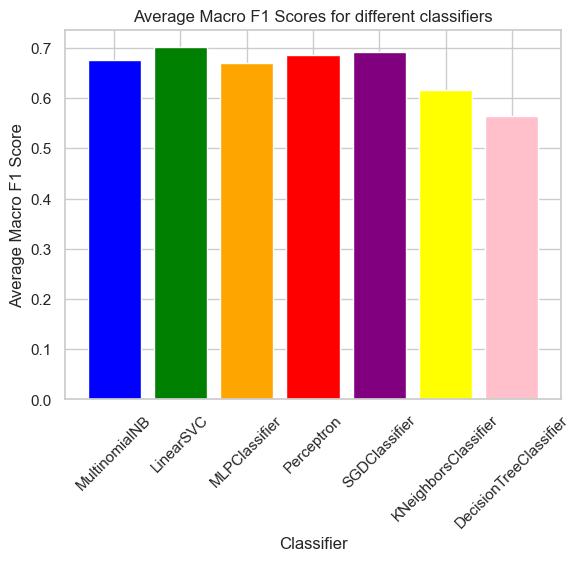

---- Iteration 1 ----
Ratio: 3.230337078651685
Ratio after loop: 0.9831460674157303
MultinomialNB - Cross-validation f1_macro scores: [0.5750258  0.70042194 0.63753318 0.75468975 0.69846154]
MultinomialNB - Mean cross-validation f1_macro score: 0.6732264434909899
MultinomialNB - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
MultinomialNB - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

LinearSVC - Cross-validation f1_macro scores: [0.59919355 0.71780604 0.61941632 0.69993876 0.6713615 ]
LinearSVC - Mean cross-validation f1_macro score: 0.6615432348640938
LinearSVC - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
LinearSVC - Last 5 predictions:
['m' 'm' 'm' 'm' 'm']

---------------------------------------------

MLPClassifier - Cross-validation f1_macro scores: [0.57331731 0.73154229 0.61482821 0.71428571 0.68571429]
MLPClassifier - Mean cross-validation f1_macro score: 0.663937561202888
MLPClassifier - First 5 predictions:
['m' 'm' 'm' 'm' 'f']
MLPC

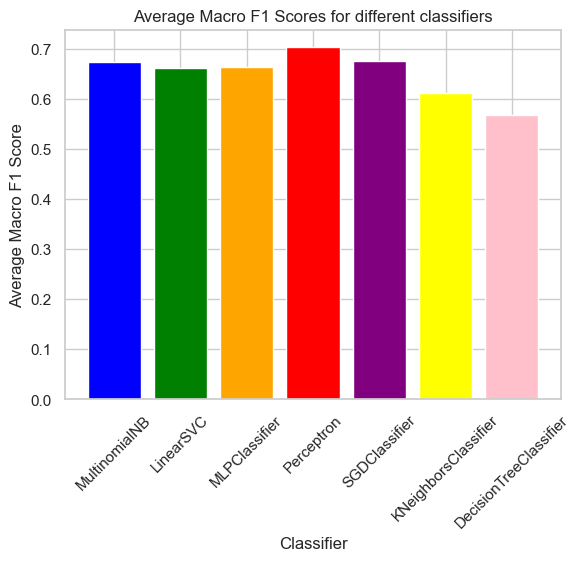

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Measuring by average macro f1 score:

Current Male:Female ratio: 0.9831460674157303
Best classifier: Perceptron
Best average f1_score: 0.7027279937279938


In [19]:
best_macro_classifier = ''
best_macro_f1_score = 0
best_macro_ratio = 0

df_train_copy = fix_male_female_ratio(df_train, ratio_limit=1)
df_test_copy = df_test.copy()

i = 0

for x in (x * 0.1 for x in range(9, 11)):
    print(f"---- Iteration {i} ----")
    i = i + 1

    df_test_copy = df_test.copy()
    df_train_copy = fix_male_female_ratio(df_train, ratio_limit=x)

    current_ratio = calculate_ratio(df_train_copy, False)

    macro_average_f1_scores = predict_gender(df_train_copy, df_test_copy)

    current_best_macro_classifier = max(macro_average_f1_scores, key=macro_average_f1_scores.get)
    current_best_macro_f1_score = macro_average_f1_scores[current_best_macro_classifier]

    
    if (current_best_macro_f1_score > best_macro_f1_score):
        best_macro_classifier = current_best_macro_classifier
        best_macro_f1_score = current_best_macro_f1_score
        best_macro_ratio = current_ratio

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

print("Measuring by average macro f1 score:\n")
print(f"Current Male:Female ratio: {best_macro_ratio}")
print(f"Best classifier: {best_macro_classifier}")
print(f"Best average f1_score: {best_macro_f1_score}")

### To sum up, the best macro average f1 score we got is: 0.7027
### Using the classifier: Perceptron

In [20]:
# Find the best classifier object
best_classifier_object = classifiers[best_macro_classifier]

# Train the classifier
vectorizer = TfidfVectorizer()
X_train_all_vec = vectorizer.fit_transform(df_train['story'])
X_test_vec = vectorizer.transform(df_test['story'])

# Predict on validation data
best_classifier_object.fit(X_train_all_vec, df_train['gender'])
y_test_pred = best_classifier_object.predict(X_test_vec)

# Save predictions
df_predicted = df_test.copy()
df_predicted.shape
df_predicted['predicted_category'] = y_test_pred
df_predicted = df_predicted.drop(columns=['story'])

Perceptron()

(323, 2)

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [21]:
df_predicted.to_csv('classification_results.csv',index=False)